# Overlay 

Visually stacking time

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,6)})
plt.style.use(['seaborn-whitegrid'])

import warnings
warnings.simplefilter('ignore')

In [2]:
import utils

filename = 'data/measured_real_power.csv'
df = utils.read_csv(filename)

What is the total load as a function of time of day?

In [3]:
total = df.sum(axis=1)
total.head()

timestamp
2013-07-01 00:00:00    9825.016
2013-07-01 00:01:00    9825.016
2013-07-01 00:02:00    9825.016
2013-07-01 00:03:00    9825.016
2013-07-01 00:04:00    9677.720
dtype: float64

In [4]:
type(total)

pandas.core.series.Series

In [5]:
total = pd.DataFrame({'values': total})
total.head()

,values
timestamp,
2013-07-01 00:00:00,9825.016
2013-07-01 00:01:00,9825.016
2013-07-01 00:02:00,9825.016
2013-07-01 00:03:00,9825.016
2013-07-01 00:04:00,9677.720


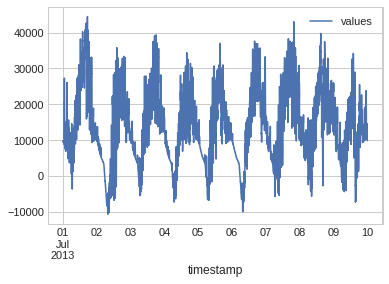

In [6]:
total.plot()

Let's add some additional columns

In [7]:
total['time'] = total.index.time
total['day'] = total.index.day
total.head()

,values,time,day
timestamp,,,
2013-07-01 00:00:00,9825.016,00:00:00,1
2013-07-01 00:01:00,9825.016,00:01:00,1
2013-07-01 00:02:00,9825.016,00:02:00,1
2013-07-01 00:03:00,9825.016,00:03:00,1
2013-07-01 00:04:00,9677.720,00:04:00,1


Pivot with wide days

In [8]:
pivot = total.pivot(index='time', columns='day', values='values')
pivot.head()

day,1,2,3,4,5,6,7,8,9,10
time,,,,,,,,,,
00:00:00,9825.016,9825.016,11962.336,16440.553,9825.016,9825.016,16668.888,14410.659,23527.299,9825.016
00:01:00,9825.016,9825.016,11962.336,16440.553,9825.016,9825.016,16668.888,14410.659,23527.299,NaN
00:02:00,9825.016,9825.016,11964.026,16430.680,9825.016,9825.016,16650.498,9825.016,25846.134,NaN
00:03:00,9825.016,9825.016,11964.026,14252.491,9825.016,9825.016,16650.498,9825.016,25846.134,NaN
00:04:00,9677.720,9677.720,11816.719,14105.251,9677.720,9677.720,16503.228,11999.799,23380.199,NaN


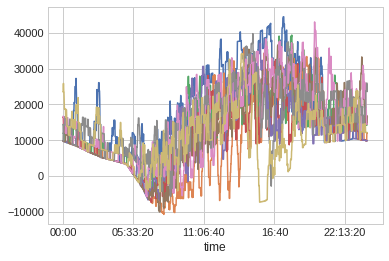

In [9]:
ax  = pivot.plot(legend=False)

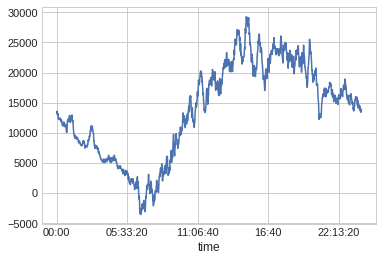

In [10]:
mean = pivot.mean(axis=1)
mean.plot()

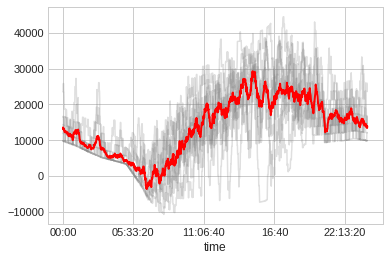

In [11]:
mean = pivot.mean(axis=1)
ax = pivot.plot(legend=False, color=['grey' for x in pivot.columns], alpha=0.25)
ax = mean.plot(lw=2, color='red', ax=ax)

## Fill between

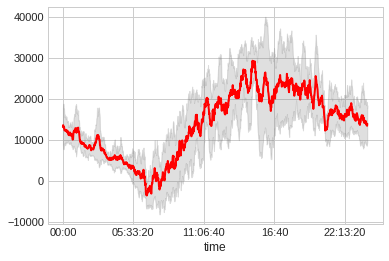

In [12]:
import matplotlib.pyplot as plt

upper = mean + pivot.std(axis=1)
lower = mean - pivot.std(axis=1)

ax = mean.plot(lw=2, color='red')
_ = ax.fill_between(upper.index, upper.values, lower.values, color='grey', alpha=0.25)

Residuals: **broadcast** the mean

In [13]:
pivot.subtract(mean, axis=0).head()

day,1,2,3,4,5,6,7,8,9,10
time,,,,,,,,,,
00:00:00,-3388.465500,-3388.465500,-1251.145500,3227.071500,-3388.465500,-3388.465500,3455.406500,1197.177500,10313.817500,-3388.4655
00:01:00,-3764.961667,-3764.961667,-1627.641667,2850.575333,-3764.961667,-3764.961667,3078.910333,820.681333,9937.321333,NaN
00:02:00,-3510.141556,-3510.141556,-1371.131556,3095.522444,-3510.141556,-3510.141556,3315.340444,-3510.141556,12510.976444,NaN
00:03:00,-3268.120556,-3268.120556,-1129.110556,1159.354444,-3268.120556,-3268.120556,3557.361444,-3268.120556,12752.997444,NaN
00:04:00,-3268.510667,-3268.510667,-1129.511667,1159.020333,-3268.510667,-3268.510667,3556.997333,-946.431667,10433.968333,NaN


We want to flatten

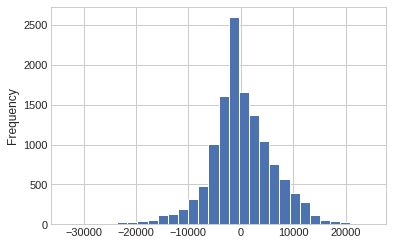

In [14]:
pivot.subtract(mean, axis=0).melt()['value'].plot(kind='hist', bins=30)

What if `std` isn't really a good description of what's happening?

## Distributions 

Let's resample a bit and look again.

In [15]:
df = utils.read_csv("data/measured_real_power.csv")
df = df.resample("15min").sum().mean(axis=1)  # resample
stacked = df.reset_index().melt(id_vars='timestamp')
stacked['time'] = stacked.timestamp.map(lambda x: x.time())
stacked['day'] = stacked.timestamp.map(lambda x: x.day)
pivot = stacked.pivot_table(index='time', columns=['variable', 'day'], values='value')

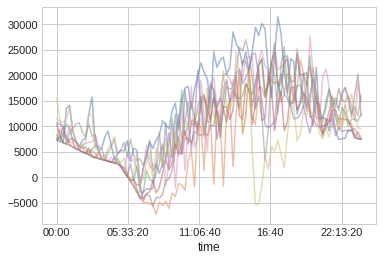

In [16]:
pivot.plot(legend=False, alpha=0.5)

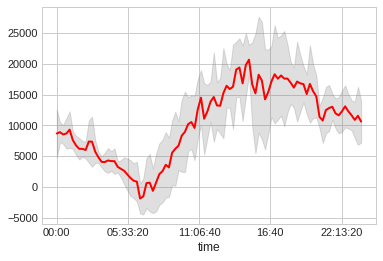

In [17]:
mean = pivot.mean(axis=1)

upper = mean + pivot.std(axis=1)
lower = mean - pivot.std(axis=1)

ax = mean.plot(lw=2, color='red')
_ = ax.fill_between(upper.index, upper.values, lower.values, color='grey', alpha=0.25)

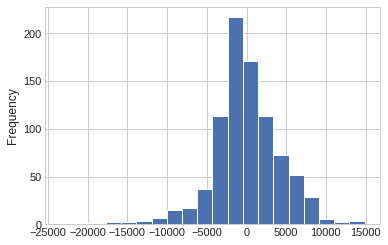

In [18]:
pivot.subtract(mean, axis=0).melt()['value'].plot(kind='hist', bins=20)

In [19]:
quant_range = [0, 0.1, 0.25, 0.75, 0.9, 1.0]
quant = pivot.quantile(quant_range, axis=1).T
quant.head()

,0.0,0.1,0.25,0.75,0.9,1.0
time,,,,,,
00:00:00,491.25080,6589.29980,7320.75850,10618.35450,11983.399975,15579.22555
00:15:00,7018.59580,7018.59580,7890.33570,10310.33400,10942.509400,10966.87200
00:30:00,6775.31640,6775.31640,6775.31640,9940.12495,10295.688420,10697.09210
00:45:00,6531.05790,6531.05790,6531.05790,10442.67170,11596.911380,13496.04190
01:00:00,6261.97845,6439.17253,6914.65155,10298.36900,13853.458130,14094.98665


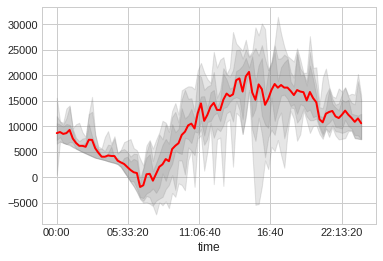

In [20]:
pivot.mean(axis=1).plot(lw=2, color='red')
for r1,r2 in zip(quant_range, list(reversed(quant_range))):    
    plt.fill_between(quant.index, quant[r1].values, quant[r2].values, color='grey', alpha=0.1 )